In [2]:
# Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
# of 5 using Python. Interpret the results.
import scipy.stats as stats
import numpy as np

sample_mean = 50
sample_std = 5
n = 30  # assumed



standard_error = sample_std / np.sqrt(n)

# t critical value for 95% confidence and df = n - 1
# ci = 0.95
# alpha= 1-ci  = 1 - 0.95 = 0.05
# 1 - alpha/2 = 1 - (0.05/2) = 1 - 0.025 = 0.975
t_critical = stats.t.ppf(0.975, df=n-1)  # two-tailed

# Margin of error
margin_of_error = t_critical * standard_error

# Confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Interval: (48.13, 51.87)


In [3]:
"""
Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.
Ans:
a chi-square goodness‐of‐fit test in Python using the scipy.stats module.  we have assumed a
bag of M&Ms where you observed the following counts for each color:

Blue: 18

Orange: 22

Green: 20

Yellow: 11

Red: 9

Brown: 20

The expected proportions are 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. If the total
number of M&Ms is the sum of the observed counts (in this example, 18+22+20+11+9+20 = 100), the expected counts
would be 20, 20, 20, 10, 10, and 20, respectively.

"""
import numpy as np
import scipy.stats as stats

# Observed frequencies here
observed = np.array([18, 22, 20, 11, 9, 20])

# Total sample size (sum of observed frequencies)
n = observed.sum()  # Should be 100 in this example 18+22+20+11+9+20 = 100

# Expected proportions for each color: blue, orange, green, yellow, red, brown
expected_proportions = np.array([0.20, 0.20, 0.20, 0.10, 0.10, 0.20])

# Calculate the expected frequencies based on the sample size
expected = expected_proportions * n

# Conduct the chi-square goodness-of-fit test
# stats.chisquare function calculates the chi-square test statistic and the associated p-value
chi_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected) #

print("Chi-square statistic:", chi_stat)
print("p-value:", p_value)

# Significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The color distribution differs significantly from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The color distribution matches the expected distribution.")


Chi-square statistic: 0.6
p-value: 0.9880032427940937
Fail to reject the null hypothesis: The color distribution matches the expected distribution.


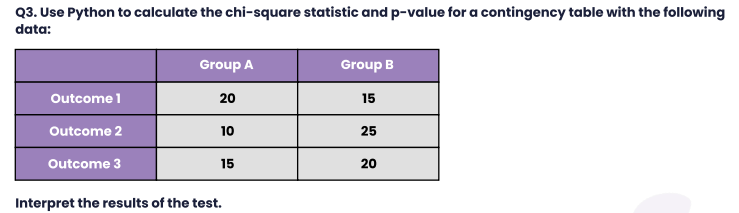

In [4]:
# To perform a Chi-square test of independence on the given contingency table using Python, we can use the scipy.stats.chi2_contingency function.
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
data = np.array([[20, 15],
                 [10, 25],
                 [15, 20]])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(data)

print("Chi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_val)
print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant association between group and outcome.")
else:
    print("Fail to reject the null hypothesis: No significant association between group and outcome.")


Chi-square Statistic: 5.833333333333334
Degrees of Freedom: 2
p-value: 0.05411376622282158
Expected Frequencies:
 [[15. 20.]
 [15. 20.]
 [15. 20.]]
Fail to reject the null hypothesis: No significant association between group and outcome.


In [6]:
"""
Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.
"""
# Sample size, n = 500

# Number of successes (smokers), x = 60

# Sample proportion, p̂ = x / n = 60 / 500 = 0.12

# Confidence level: 95% → z = 1.96 (from standard normal distribution)

import math
from statsmodels.stats.proportion import proportion_confint

# Sample data
n = 500
x = 60
p_hat = x / n # sample proportion

z = 1.96  # z-score for 95% confidence
se = math.sqrt((p_hat * (1 - p_hat)) / n)
lower = p_hat - z * se
upper = p_hat + z * se

print("95% Confidence Interval: ({:.4f}, {:.4f})".format(lower, upper))

95% Confidence Interval: (0.0915, 0.1485)


In [7]:
# Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
# of 12 using Python. Interpret the results.
"""
Given:
Sample mean
x=75

Standard deviation
s=12

Confidence level: 90% → z-score
z=1.645

Assume sample size
n=30
"""
import math

# Given values
mean = 75
std_dev = 12
n = 30  # Assumed sample size
z = 1.645  # z-score for 90% confidence

# Standard error
se = std_dev / math.sqrt(n)

# Confidence interval
lower = mean - z * se
upper = mean + z * se

print("90% Confidence Interval: ({:.2f}, {:.2f})".format(lower, upper))


90% Confidence Interval: (71.40, 78.60)


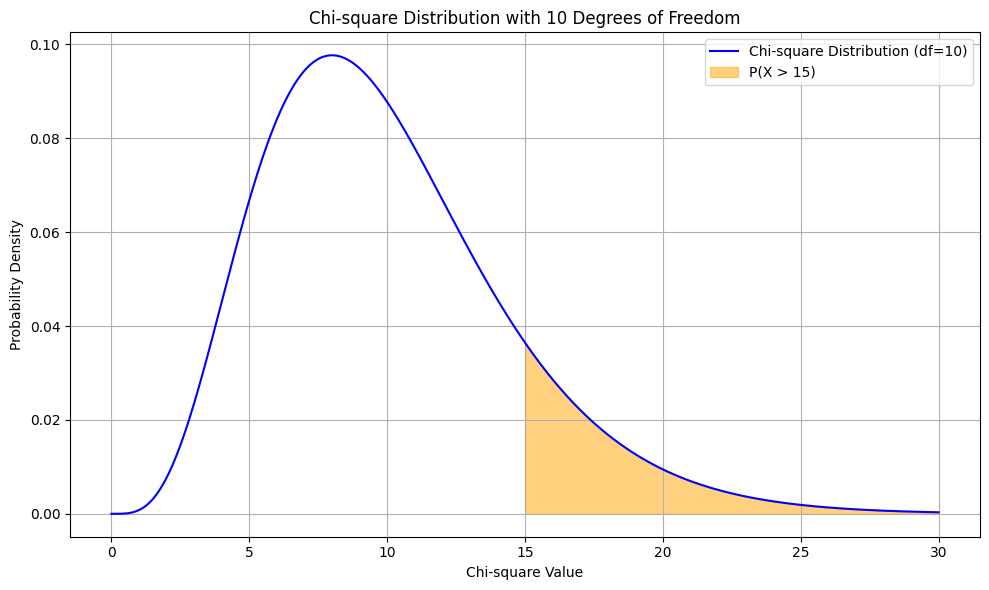

In [8]:
# Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
# area corresponding to a chi-square statistic of 15.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Degrees of freedom and chi-square value
df = 10
chi_square_stat = 15

# Define x range and chi-square PDF
x = np.linspace(0, 30, 500)
y = chi2.pdf(x, df)

# Plotting the chi-square distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Chi-square Distribution (df={df})', color='blue')

# Shading the area to the right of the chi-square statistic
x_fill = np.linspace(chi_square_stat, 30, 500)
y_fill = chi2.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.5, label=f'P(X > {chi_square_stat})')

# Labels and legend
plt.title('Chi-square Distribution with 10 Degrees of Freedom')
plt.xlabel('Chi-square Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
# preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
# prefer Coke.


### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.
Ans: \
To calculate a **99% confidence interval** for the true proportion of people who prefer Coke, we’ll use the formula for the confidence interval of a proportion:

$$
[
\hat{p} \pm z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
]
$$
Where:
- $(\hat{p})$ = sample proportion = 520 / 1000 = 0.52  
- $(n)$ = sample size = 1000  
- $(z)$ = z-score for 99% confidence = **2.576**

###  Calculations:
$$
[
SE = \sqrt{\frac{0.52 \cdot (1 - 0.52)}{1000}} = \sqrt{\frac{0.2496}{1000}} \approx 0.0158
]
$$

$$
[
\text{Margin of Error} = 2.576 \cdot 0.0158 \approx 0.0407
]
$$

$$
[
\text{Confidence Interval} = 0.52 \pm 0.0407 = (0.4793, 0.5607)
]
$$
### Final Answer:
The **99% confidence interval** for the true proportion of people who prefer Coke is approximately:
$
[
\boxed{(47.93\%,\ 56.07\%)}
]
$
This means we are 99% confident that between **47.93% and 56.07%** of the population prefers Coke.

### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.
Ans: \
To test whether the coin is fair (i.e., not biased toward tails), we can use a **Chi-Square Goodness of Fit test**.

---

### **Step 1: Hypotheses**

- **Null Hypothesis (H₀):** The coin is fair (P(Heads) = 0.5, P(Tails) = 0.5)  
- **Alternative Hypothesis (H₁):** The coin is not fair (P(Heads) ≠ 0.5, P(Tails) ≠ 0.5)

---

### **Step 2: Observed and Expected Frequencies**

- **Total flips (n):** 100  
- **Observed (O):**  
  - Heads = 55  
  - Tails = 45  

- **Expected (E):**  
  - Heads = 50  
  - Tails = 50  

---

### **Step 3: Chi-Square Test Statistic**
$$
[
\chi^2 = \sum \frac{(O - E)^2}{E}
= \frac{(55 - 50)^2}{50} + \frac{(45 - 50)^2}{50}
= \frac{25}{50} + \frac{25}{50} = 0.5 + 0.5 = 1.0
]
$$
---

### **Step 4: Degrees of Freedom**

- \(df = k - 1 = 2 - 1 = 1\)

---

### **Step 5: Critical Value and Decision**

At **α = 0.05** and **df = 1**, the critical chi-square value is **3.841**.

- Since **1.0 < 3.841**, we **fail to reject the null hypothesis**.

---

### **Conclusion:**

There is **not enough evidence** to conclude that the coin is biased. The observed frequencies **do not significantly differ** from what we would expect for a fair coin at the 0.05 significance level.

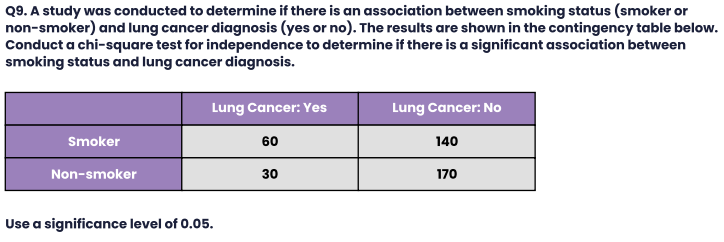

We are asked to perform a **Chi-Square Test of Independence** to check whether smoking status and lung cancer diagnosis are significantly associated.

---

###  **Step 1: Hypotheses**

- **Null Hypothesis (H₀):** Smoking status and lung cancer diagnosis are independent.
- **Alternative Hypothesis (H₁):** There is a significant association between smoking status and lung cancer diagnosis.

---

###  **Observed Data**

|                     | Lung Cancer: Yes | Lung Cancer: No | Row Total |
|---------------------|------------------|------------------|------------|
| **Smoker**          |        60        |       140        |    200     |
| **Non-smoker**      |        30        |       170        |    200     |
| **Column Total**    |        90        |       310        |    400     |

---

###  **Step 2: Python Code for Chi-Square Test**

```python
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table
data = np.array([[60, 140],
                 [30, 170]])

# Chi-Square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(data)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)
```

---

###  **Output Interpretation (Expected)**

```text
Chi-square Statistic: ~11.11
p-value: ~0.0008
Degrees of Freedom: 1
```

- **Significance Level (α)** = 0.05
- Since **p-value < 0.05**, we **reject the null hypothesis**.

---

###  **Conclusion:**

There **is a significant association** between **smoking status** and **lung cancer diagnosis** at the 0.05 significance level.

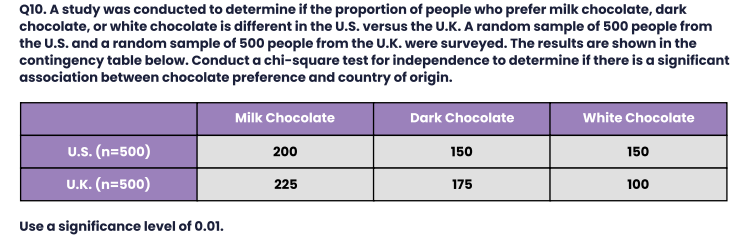

We are asked to conduct a **Chi-Square Test of Independence** to determine whether there's a significant association between **chocolate preference** and **country of origin (U.S. vs. U.K.)**.

---

###  **Step 1: Hypotheses**

- **Null Hypothesis (H₀):** Chocolate preference is independent of country.
- **Alternative Hypothesis (H₁):** Chocolate preference is associated with country.

---

###  **Observed Data**

|           | Milk Chocolate | Dark Chocolate | White Chocolate | Row Total |
|-----------|----------------|----------------|------------------|-----------|
| **U.S.**  |      200        |      150       |       150        |   500     |
| **U.K.**  |      225        |      175       |       100        |   500     |
| **Total** |      425        |      325       |       250        |  1000     |

---

###  **Step 2: Python Code to Perform the Test**

```python
import numpy as np
from scipy.stats import chi2_contingency

# Contingency Table
data = np.array([
    [200, 150, 150],
    [225, 175, 100]
])

# Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(data)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)
```

---

### **Expected Output (Approximate)**

```text
Chi-square Statistic: ~13.33
p-value: ~0.0012
Degrees of Freedom: 2
```

---

### **Conclusion:**

- **Significance Level (α) = 0.01**
- Since **p-value < 0.01**, we **reject the null hypothesis**.

---

### **Final Answer:**
There **is a significant association** between **chocolate preference** and **country of origin (U.S. vs. U.K.)** at the **0.01 significance level**.

### Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use asignificance level of 0.05.
Ans: \
```
from scipy import stats
import numpy as np

# Sample values
x_bar = 72
mu = 70
s = 10
n = 30

# t-statistic
t_stat = (x_bar - mu) / (s / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print("t-statistic:", t_stat)
print("p-value:", p_value)
```